In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import time
import tracemalloc
import pandas as pd
import numpy as np
from networkx.algorithms.tree import minimum_spanning_tree

In [2]:
# Set the default color palette with yellow tones
yellow_colors = {
    'background': '#FFFEF2',
    'node_default': '#FFF4A3',
    'node_visited': '#FFD700',
    'node_current': '#FFA500',
    'edge_default': '#CCCCCC',
    'edge_mst': '#FFD700',
    'edge_candidate': '#FFAA00',
    'edge_current': '#FF8C00',
    'edge_rejected': '#FF4500',
    'unsorted': '#FFCC66'
}

# Configure plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = yellow_colors['background']
plt.rcParams['axes.facecolor'] = yellow_colors['background']

### Prim's Algorithm 

Prim’s algorithm builds a **Minimum Spanning Tree (MST)** using a **greedy approach**.

**Steps:**
1. Start with any random vertex.
2. Add the **smallest edge** that connects the tree to a **new vertex**.
3. Repeat step 2 until all vertices are included.

It always picks the **lowest-weight edge** that expands the tree without forming a cycle.


In [3]:



def prim(graph, start):
    
    visited = set()
    mst = []
    edges = []

    visited.add(start)

    # Add all edges from the starting vertex
    for dest, weight in graph[start].items():
        edges.append((start, dest, weight))

    while edges:
        # Find the edge with minimum weight
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[2] < min_edge[2]:
                min_edge = edge
        edges.remove(min_edge)

        src, dest, weight = min_edge

        # Skip if destination already visited (prevents cycles)
        if dest in visited:
            continue

        # Add edge to MST and mark destination as visited
        mst.append((src, dest, weight))
        visited.add(dest)

        # Add all edges from the new vertex
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                edges.append((dest, next_dest, next_weight))

    return mst

optimed version:

In [4]:
def prim_optimized(graph, start):
    """
    Optimized implementation of Prim's algorithm that uses sorting
    to efficiently find the minimum weight edge.
    
    Args:
        graph: Dictionary representation of graph
        start: Starting vertex
        
    Returns:
        List of edges in the minimum spanning tree
    """
    visited = set([start])
    edges = []
    mst = []

    # Add initial edges and sort them by weight
    for dest, weight in graph[start].items():
        edges.append((weight, start, dest))
    edges.sort()
    
    while edges:
        weight, src, dest = edges.pop(0)  # Take the edge with minimum weight

        if dest in visited:
            continue

        mst.append((src, dest, weight))
        visited.add(dest)

        # Add new edges from the newly added vertex
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                edges.append((next_weight, dest, next_dest))

        # Re-sort after adding new edges
        edges.sort()

    return mst


### Kruskal's Algorithm 

Kruskal’s algorithm builds a **Minimum Spanning Tree (MST)** using a **greedy approach**.

**Steps:**
1. Sort all edges by weight (from lowest to highest).
2. Add the **smallest edge** that **doesn't form a cycle**.
3. Repeat until all vertices are connected.

It always picks the next lightest edge that connects two different trees.


In [5]:
def find(parent, node):
    while parent[node] != node:
        node = parent[node]
    return node

def union_naive(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)
    parent[root2] = root1

def kruskal(graph):
   
    edges = []
    # Collect all edges from the graph
    for node in graph:
        for neighbor, weight in graph[node].items():
            edges.append((weight, node, neighbor))

    mst = []
    # Initialize disjoint set for union-find
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    while edges:
        # Find minimum weight edge
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[0] < min_edge[0]:
                min_edge = edge
        edges.remove(min_edge)

        weight, node1, node2 = min_edge

        # Check if adding the edge creates a cycle
        if find(parent, node1) != find(parent, node2):
            union_naive(parent, rank, node1, node2)
            mst.append((node1, node2, weight))

    return mst

optimized version


In [6]:
def find_optimized(parent, node):
    """Find with path compression for better efficiency"""
    if parent[node] != node:
        parent[node] = find_optimized(parent, parent[node])
    return parent[node]

def union_optimized(parent, rank, node1, node2):
    """Union by rank for better efficiency"""
    root1 = find_optimized(parent, node1)
    root2 = find_optimized(parent, node2)

    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        elif rank[root1] < rank[root2]:
            parent[root1] = root2
        else:
            parent[root2] = root1
            rank[root1] += 1

def kruskal_optimized(graph):
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            edges.append((weight, node, neighbor))

    # Sort edges once at the beginning
    edges.sort()

    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}
    mst = []

    for weight, node1, node2 in edges:
        if find_optimized(parent, node1) != find_optimized(parent, node2):
            union_optimized(parent, rank, node1, node2)
            mst.append((node1, node2, weight))

    return mst


### Testing Algorithms

In [7]:
test_graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

# Test Prim's algorithm
prim_mst = prim(test_graph, '0')
print("Prim's Algorithm Result:")
for src, dest, weight in prim_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test optimized Prim's algorithm
prim_opt_mst = prim_optimized(test_graph, '0')
print("\nOptimized Prim's Algorithm Result:")
for src, dest, weight in prim_opt_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test Kruskal's algorithm
kruskal_mst = kruskal(test_graph)
print("\nKruskal's Algorithm Result:")
for src, dest, weight in kruskal_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test optimized Kruskal's algorithm
kruskal_opt_mst = kruskal_optimized(test_graph)
print("\nOptimized Kruskal's Algorithm Result:")
for src, dest, weight in kruskal_opt_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

Prim's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Optimized Prim's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Kruskal's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Optimized Kruskal's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4


# ## 5. Visualization: Prim's Algorithm Step-by-Step

/tmp/ipykernel_73327/1876315171.py:269: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

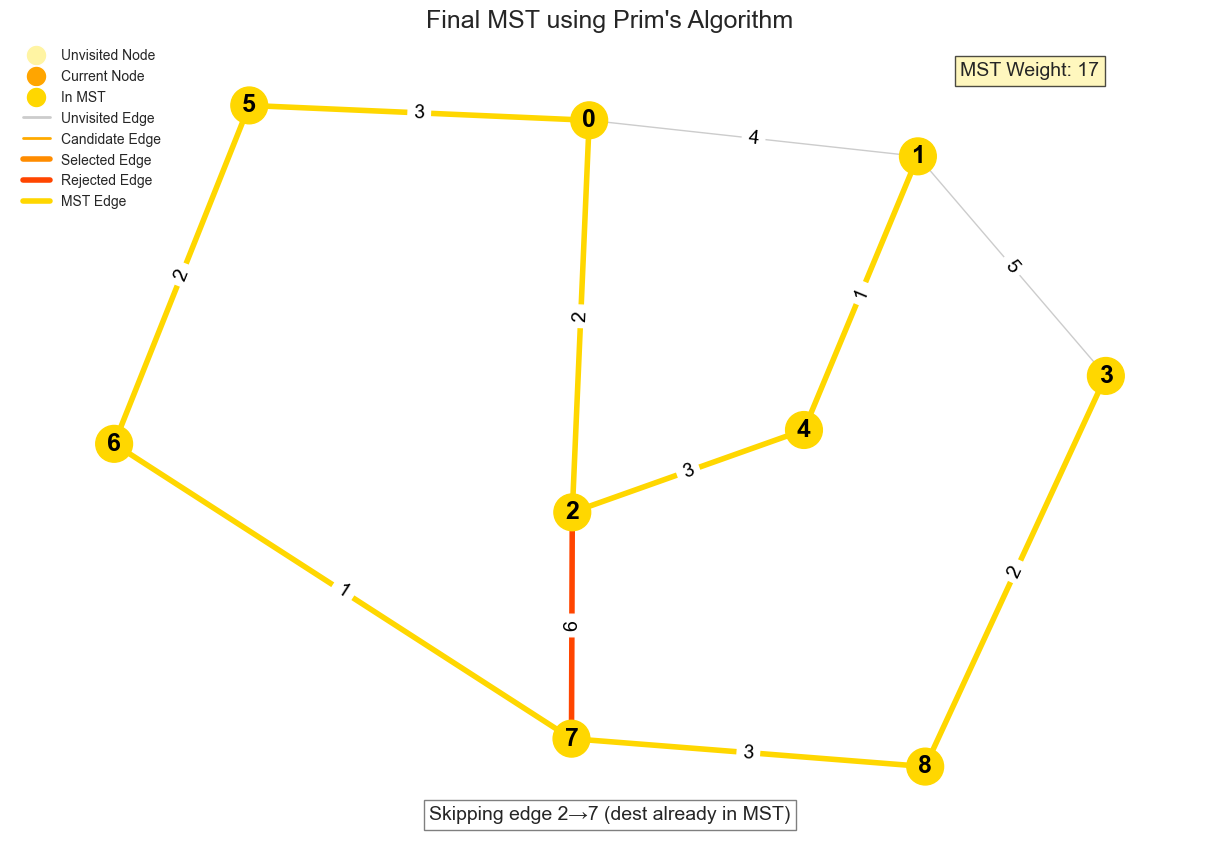

In [8]:
def prim_optimized_with_steps(graph, start):
  
    visited = set([start])
    edges = []
    mst = []
    steps = []

    # Initial state
    steps.append({
        'event': 'initialize',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': []
    })

    # Add initial edges
    initial_edges = []
    for dest, weight in graph[start].items():
        initial_edges.append((weight, start, dest))

    steps.append({
        'event': 'add_edges',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': initial_edges.copy(),
        'unsorted': True
    })

    # Sort edges
    initial_edges.sort()
    edges = initial_edges.copy()

    steps.append({
        'event': 'sort_edges',
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': edges.copy()
    })

    while edges:
        # Select the edge with minimum weight
        weight, src, dest = edges[0]
        current_edges = [(src, dest, weight)]

        steps.append({
            'event': 'select_edge',
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        edges.pop(0)

        # Skip if destination already visited
        if dest in visited:
            steps.append({
                'event': 'skip_edge',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': current_edges,
                'all_edges': edges.copy()
            })
            continue

        # Add edge to MST
        mst.append((src, dest, weight))
        visited.add(dest)

        steps.append({
            'event': 'add_to_mst',
            'node': dest,
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        # Add new edges
        new_edges = []
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                new_edge = (next_weight, dest, next_dest)
                edges.append(new_edge)
                new_edges.append((dest, next_dest, next_weight))

        if new_edges:
            steps.append({
                'event': 'add_edges',
                'node': dest,
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': new_edges,
                'all_edges': edges.copy(),
                'unsorted': True
            })

            edges.sort()

            steps.append({
                'event': 'sort_edges',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': [],
                'all_edges': edges.copy()
            })

    return steps

# Define a slightly larger graph for visualization
visualization_graph = {
    '0': {'1': 4, '2': 2, '5': 3},
    '1': {'0': 4, '3': 5, '4': 1},
    '2': {'0': 2, '4': 3, '7': 6},
    '3': {'1': 5, '8': 2},
    '4': {'1': 1, '2': 3},
    '5': {'0': 3, '6': 2},
    '6': {'5': 2, '7': 1},
    '7': {'2': 6, '6': 1, '8': 3},
    '8': {'3': 2, '7': 3}
}

# Create a NetworkX graph
G_prim = nx.Graph()
for node, neighbors in visualization_graph.items():
    for neighbor, weight in neighbors.items():
        G_prim.add_edge(node, neighbor, weight=weight)

# Get the steps
prim_steps = prim_optimized_with_steps(visualization_graph, '0')

# Define colors based on yellow theme
node_colors = {
    'unvisited': yellow_colors['node_default'],
    'visited': yellow_colors['node_visited'],  
    'current': yellow_colors['node_current']
}

edge_colors = {
    'unvisited': yellow_colors['edge_default'],
    'mst': yellow_colors['edge_mst'],
    'candidate': yellow_colors['edge_candidate'],
    'current': yellow_colors['edge_current'],
    'rejected': yellow_colors['edge_rejected'],
    'unsorted': yellow_colors['unsorted']
}

# Visualization function
def update_prim(frame):
    plt.clf()
    step = prim_steps[frame]
    event = step['event']
    visited_nodes = step['visited']
    mst_edges = step['mst']
    current_edges = step['current_edges']
    unsorted = step.get('unsorted', False)
    
    # Fixed layout for consistent visualization
    pos = nx.spring_layout(G_prim, seed=42)
    
    # Color nodes
    node_color_map = []
    for node in G_prim.nodes():
        if event in ['add_to_mst', 'add_edges'] and 'node' in step and node == step['node']:
            node_color_map.append(node_colors['current'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])
    
    # Color edges
    edge_color_map = []
    edge_width_map = []
    
    for u, v in G_prim.edges():
        edge = None
        for src, dest, _ in mst_edges:
            if (u == src and v == dest) or (u == dest and v == src):
                edge = 'mst'
                break
        
        if edge != 'mst':
            for src, dest, _ in current_edges:
                if (u == src and v == dest) or (u == dest and v == src):
                    if event == 'skip_edge':
                        edge = 'rejected'
                    else:
                        edge = 'current'
                    break
            
            if edge is None:
                for weight, src, dest in step['all_edges']:
                    if (u == src and v == dest) or (u == dest and v == src):
                        edge = 'unsorted' if unsorted else 'candidate'
                        break
        
        if edge is None:
            edge = 'unvisited'
        
        edge_color_map.append(edge_colors[edge])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)
    
    # Draw graph
    nx.draw(G_prim, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')
    
    # Add edge labels
    edge_labels = nx.get_edge_attributes(G_prim, 'weight')
    nx.draw_networkx_edge_labels(G_prim, pos, edge_labels=edge_labels, font_size=14)
    
    plt.title(f"Prim's Algorithm - Step {frame+1}/{len(prim_steps)}", fontsize=16)
    
    # Add description
    if event == 'initialize':
        description = f"Starting with node: {step['node']}"
    elif event == 'add_edges':
        description = f"Adding edges from node {step['node']} to candidate list"
    elif event == 'sort_edges':
        description = "Sorting edges by weight"
    elif event == 'select_edge':
        src, dest, weight = current_edges[0]
        description = f"Selected minimum weight edge: {src}→{dest} (weight: {weight})"
    elif event == 'skip_edge':
        src, dest, weight = current_edges[0]
        description = f"Skipping edge {src}→{dest} (dest already in MST)"
    elif event == 'add_to_mst':
        edge = current_edges[0]
        description = f"Adding edge {edge[0]}→{edge[1]} (weight: {edge[2]}) to MST"
    
    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Add MST weight info
    total_weight = sum(weight for _, _, weight in mst_edges)
    plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                ha="center", fontsize=14, bbox={"facecolor": yellow_colors['node_default'], "alpha": 0.7})
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['current'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='In MST'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['candidate'], lw=2, label='Candidate Edge'),
        plt.Line2D([0], [0], color=edge_colors['current'], lw=4, label='Selected Edge'),
        plt.Line2D([0], [0], color=edge_colors['rejected'], lw=4, label='Rejected Edge'),
        plt.Line2D([0], [0], color=edge_colors['mst'], lw=4, label='MST Edge')
    ]
    
    plt.legend(handles=legend_elements, loc='upper left')

# Create animation
fig_prim = plt.figure(figsize=(12, 8))
ani_prim = FuncAnimation(fig_prim, update_prim, frames=len(prim_steps), interval=1500, repeat=True)




# Display static figure of the final state for the notebook
plt.figure(figsize=(12, 8))
update_prim(len(prim_steps) - 1)
plt.title("Final MST using Prim's Algorithm", fontsize=18)
plt.tight_layout()
plt.show()

### 6. Visualization: Kruskal's Algorithm Step-by-Step

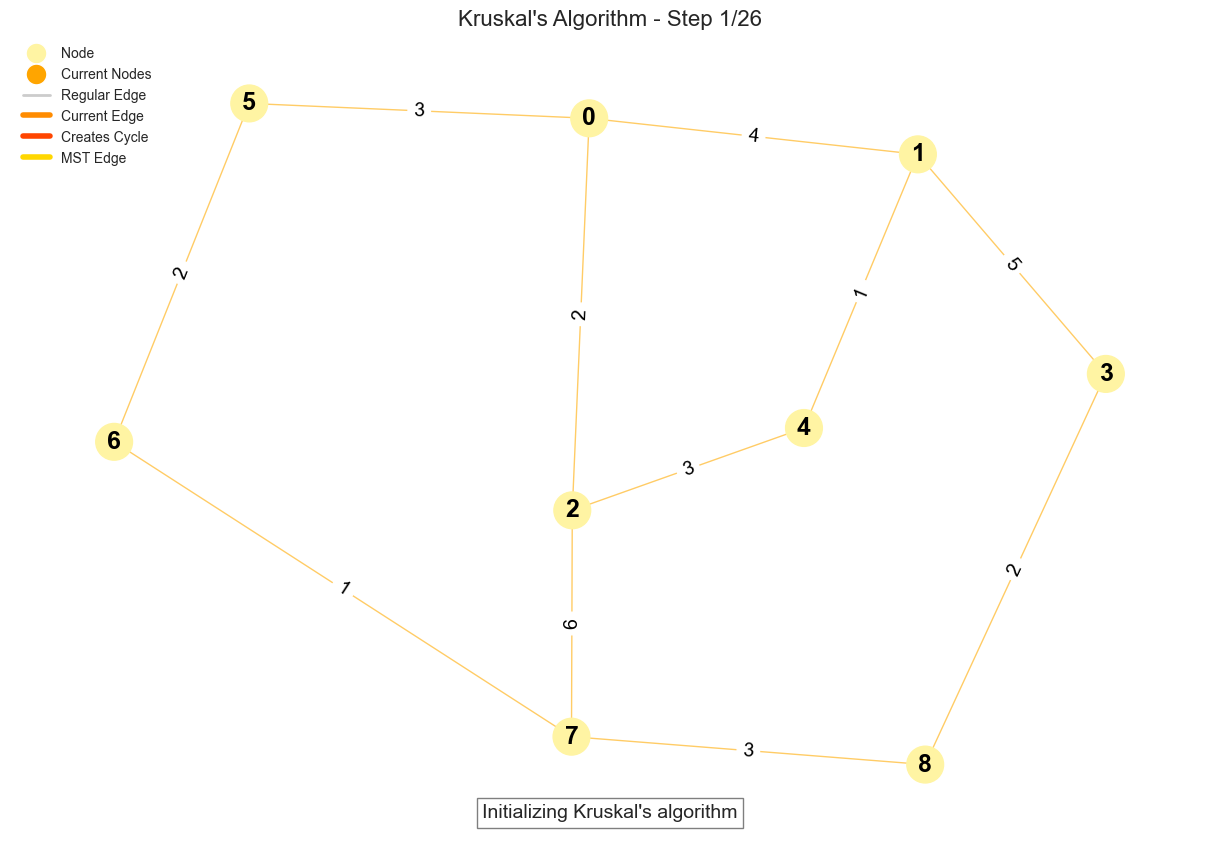

In [10]:
def kruskal_optimized_with_steps(graph):
    """
    Kruskal's algorithm implementation that records steps for visualization.
    
    Args:
        graph: Dictionary representation of graph
        
    Returns:
        List of steps for visualization
    """
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            if node < neighbor:  # Avoid duplicate edges
                edges.append((weight, node, neighbor))

    steps = []

    # Initial state
    steps.append({
        'event': 'initialize',
        'description': 'Initializing Kruskal\'s algorithm',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy(),
        'unsorted': True
    })

    # Sort edges
    edges.sort()

    steps.append({
        'event': 'sort_edges',
        'description': 'Sorting all edges by weight',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    # Initialize Union-Find
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    steps.append({
        'event': 'init_union_find',
        'description': 'Initializing Union-Find data structure',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    mst = []

    for weight, node1, node2 in edges:
        current_edge = (node1, node2, weight)

        steps.append({
            'event': 'check_edge',
            'description': f'Checking edge {node1}→{node2} (weight: {weight})',
            'parent': parent.copy(),
            'rank': rank.copy(),
            'mst': mst.copy(),
            'current_edge': current_edge,
            'all_edges': edges.copy()
        })

        root1 = find_optimized(parent, node1)
        root2 = find_optimized(parent, node2)

        if root1 != root2:
            old_parent = parent.copy()
            old_rank = rank.copy()

            union_optimized(parent, rank, node1, node2)

            mst.append((node1, node2, weight))

            steps.append({
                'event': 'add_to_mst',
                'description': f'Adding edge {node1}→{node2} (weight: {weight}) to MST',
                'old_parent': old_parent,
                'old_rank': old_rank,
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })
        else:
            steps.append({
                'event': 'skip_edge',
                'description': f'Skipping edge {node1}→{node2} - would create a cycle',
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })

    # Final state
    steps.append({
        'event': 'complete',
        'description': 'Kruskal\'s algorithm complete',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': mst.copy(),
        'current_edge': None,
        'all_edges': edges.copy()
    })

    return steps

# Create a NetworkX graph for Kruskal's algorithm
G_kruskal = nx.Graph()
for node, neighbors in visualization_graph.items():
    for neighbor, weight in neighbors.items():
        if node < neighbor:  # Avoid duplicate edges
            G_kruskal.add_edge(node, neighbor, weight=weight)

# Get the steps
kruskal_steps = kruskal_optimized_with_steps(visualization_graph)

# Helper function to get connected components
def get_connected_components(parent):
    components = {}
    parent_copy = parent.copy()
    
    for node in parent_copy:
        root = find_optimized(parent_copy, node)
        
        if root not in components:
            components[root] = []
        components[root].append(node)
    
    return components

# Visualization function
def update_kruskal(frame):
    plt.clf()
    step = kruskal_steps[frame]
    event = step['event']
    
    # Fixed layout for consistent visualization
    pos = nx.spring_layout(G_kruskal, seed=42)
    
    # Color nodes
    node_color_map = [yellow_colors['node_default'] for _ in G_kruskal.nodes()]
    
    if step['current_edge']:
        node1, node2, _ = step['current_edge']
        for i, node in enumerate(G_kruskal.nodes()):
            if node == node1 or node == node2:
                node_color_map[i] = yellow_colors['node_current']
    
    # Color edges
    edge_color_map = []
    edge_width_map = []
    
    for u, v in G_kruskal.edges():
        edge = 'default'
        
        for n1, n2, _ in step.get('mst', []):
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                edge = 'mst'
                break
        
        if step['current_edge']:
            n1, n2, _ = step['current_edge']
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                if event == 'skip_edge':
                    edge = 'rejected'
                else:
                    edge = 'current'
        
        if event == 'initialize' and step.get('unsorted', False):
            for weight, n1, n2 in step['all_edges']:
                if (u == n1 and v == n2) or (u == n2 and v == n1):
                    edge = 'unsorted'
                    break
        
        edge_color_map.append(edge_colors[edge if edge in edge_colors else 'default'])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)
    
    # Draw graph
    nx.draw(G_kruskal, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')
    
    # Add edge labels
    edge_labels = nx.get_edge_attributes(G_kruskal, 'weight')
    nx.draw_networkx_edge_labels(G_kruskal, pos, edge_labels=edge_labels, font_size=14)
    
    plt.title(f"Kruskal's Algorithm - Step {frame+1}/{len(kruskal_steps)}", fontsize=16)
    
    # Add description
    plt.figtext(0.5, 0.02, step['description'],
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Display connected components
    if step['parent']:
        try:
            components = get_connected_components(step['parent'])
            forest_text = "Connected Components: "
            component_strs = []
            
            for root, members in components.items():
                component_strs.append("[" + ", ".join(sorted(members)) + "]")
            
            forest_text += ", ".join(component_strs[:3])
            if len(component_strs) > 3:
                forest_text += f" + {len(component_strs) - 3} more"
            
            plt.figtext(0.5, 0.06, forest_text,
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})
        except Exception as e:
            plt.figtext(0.5, 0.06, "Union-Find structure initialized",
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Add MST weight info
    if step['mst']:
        total_weight = sum(weight for _, _, weight in step['mst'])
        plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                    ha="center", fontsize=14, bbox={"facecolor": yellow_colors['node_default'], "alpha": 0.7})
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=yellow_colors['node_default'], markersize=15, label='Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=yellow_colors['node_current'], markersize=15, label='Current Nodes'),
        plt.Line2D([0], [0], color=yellow_colors['edge_default'], lw=2, label='Regular Edge'),
        plt.Line2D([0], [0], color=yellow_colors['edge_current'], lw=4, label='Current Edge'),
        plt.Line2D([0], [0], color=yellow_colors['edge_rejected'], lw=4, label='Creates Cycle'),
        plt.Line2D([0], [0], color=yellow_colors['edge_mst'], lw=4, label='MST Edge')
    ]
    
    plt.legend(handles=legend_elements, loc='upper left')

# Create Kruskal's animation
fig_kruskal = plt.figure(figsize=(12, 8))
ani_kruskal = FuncAnimation(fig_kruskal, update_kruskal, frames=len(kruskal_steps), interval=1500, repeat=True)






# Analysis


MST ALGORITHM PERFORMANCE ANALYZER
Step 1: Generating sample graph visualizations...


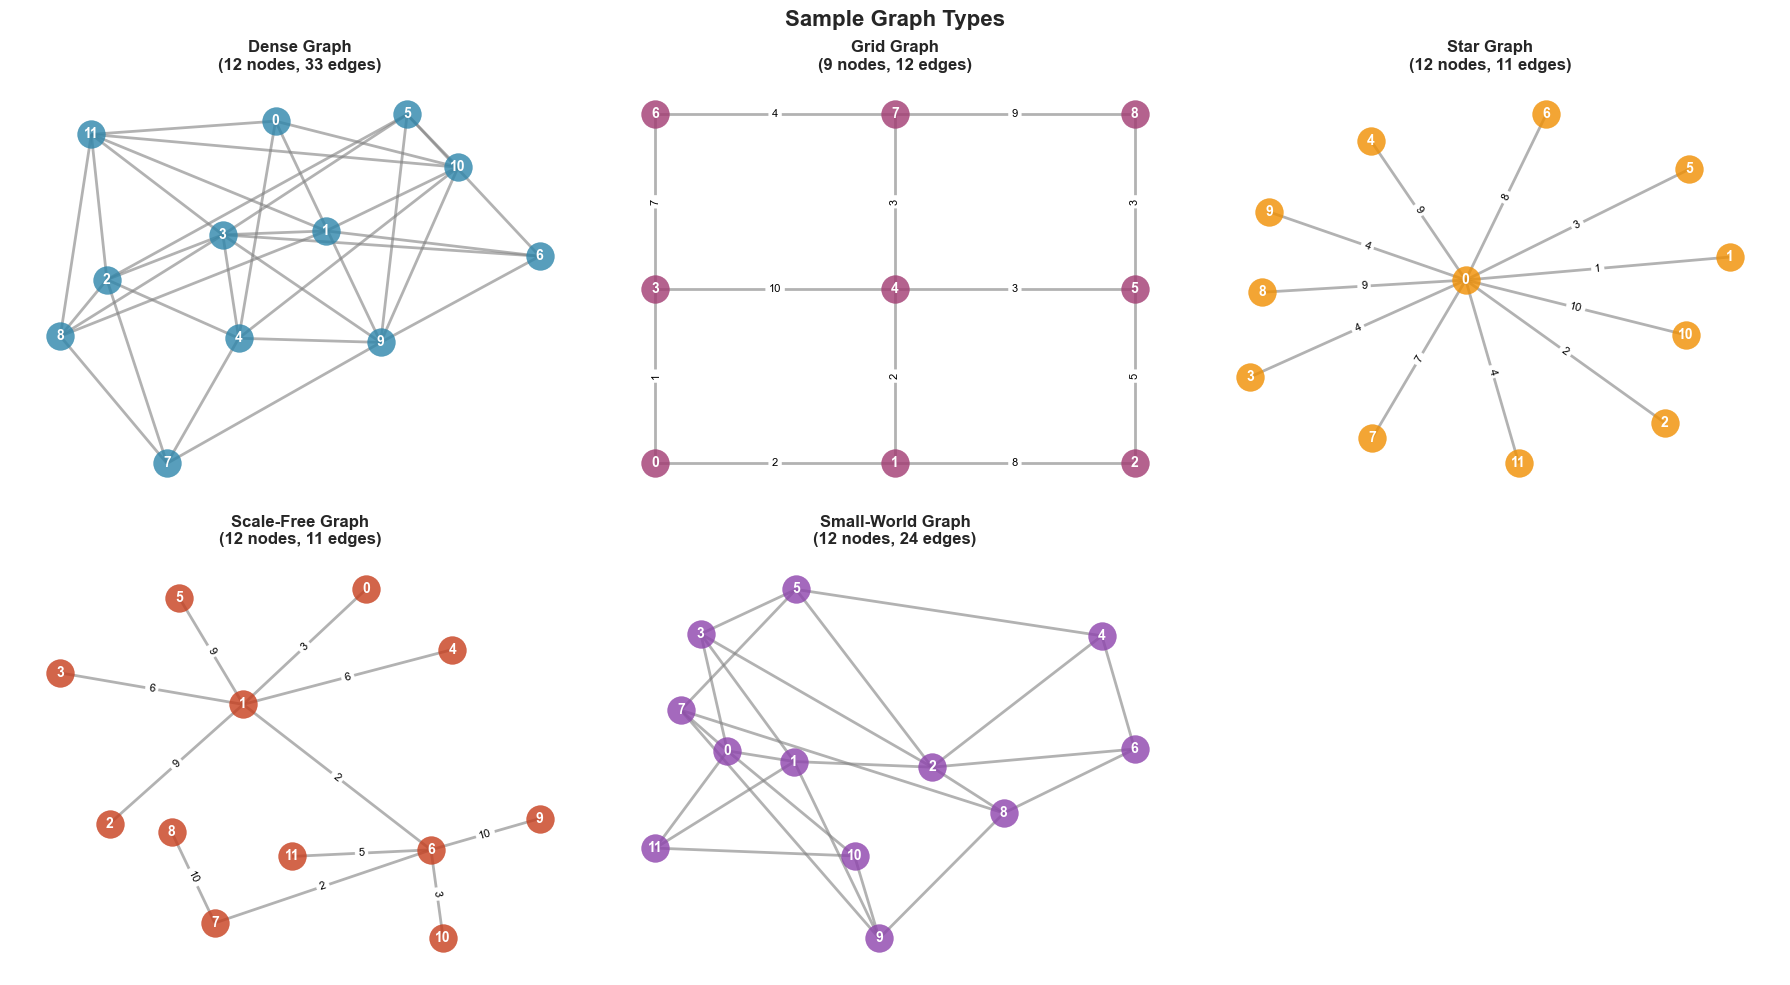

<Figure size 800x550 with 0 Axes>

✓ Sample graphs generated successfully!

Step 2: Running performance analysis...
Running MST Algorithm Performance Analysis...
Testing graphs of size 30...
Testing graphs of size 50...
Testing graphs of size 80...
Testing graphs of size 120...
Testing graphs of size 150...
✓ Performance analysis completed!

Step 3: Displaying detailed results...
     Graph Type  Size  Prim Time (s)  Prim Memory (KB)  Kruskal Time (s)  \
0         Dense    30       0.002396         54.023438          0.002049   
1          Grid    30       0.000336         19.578125          0.000490   
2          Star    30       0.000364         22.593750          0.000507   
3    Scale-Free    30       0.000426         22.304688          0.000675   
4   Small-World    30       0.000433         22.101562          0.001078   
5         Dense    50       0.002530         74.261719          0.003004   
6          Grid    50       0.000643         33.117188          0.001000   
7          Star    50       0.000615        

<Figure size 2000x1200 with 0 Axes>

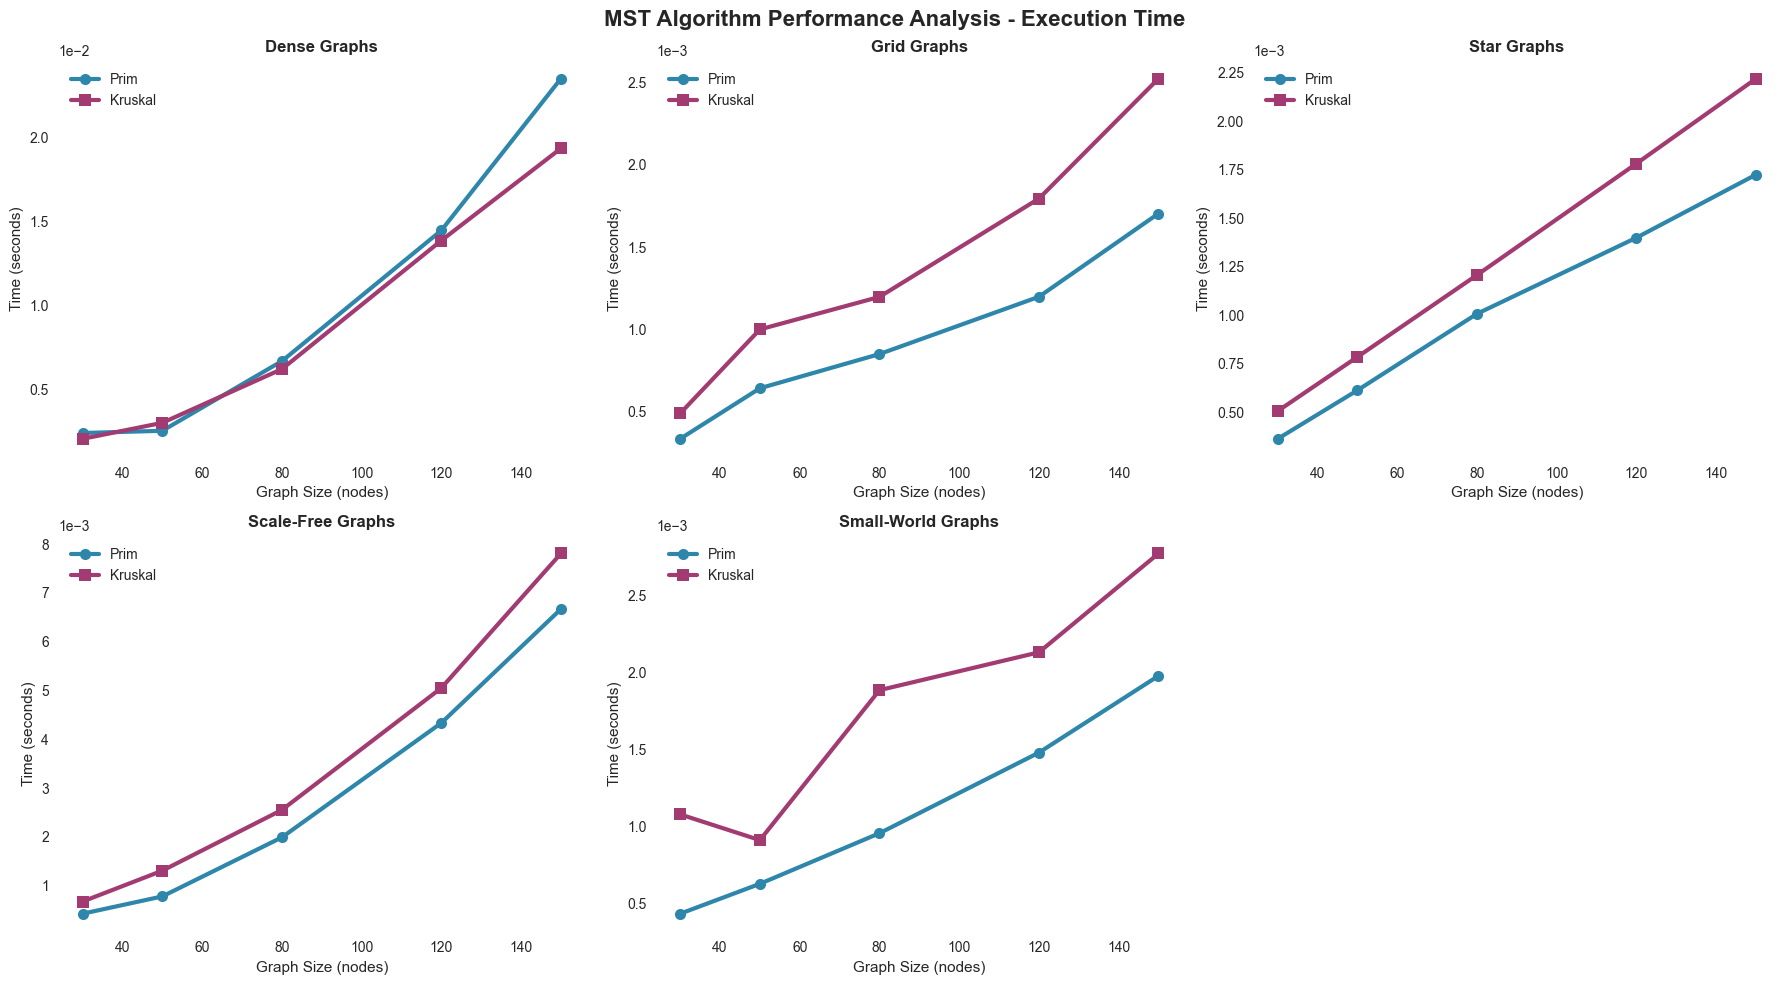

<Figure size 800x550 with 0 Axes>

✓ Time comparison plots generated!


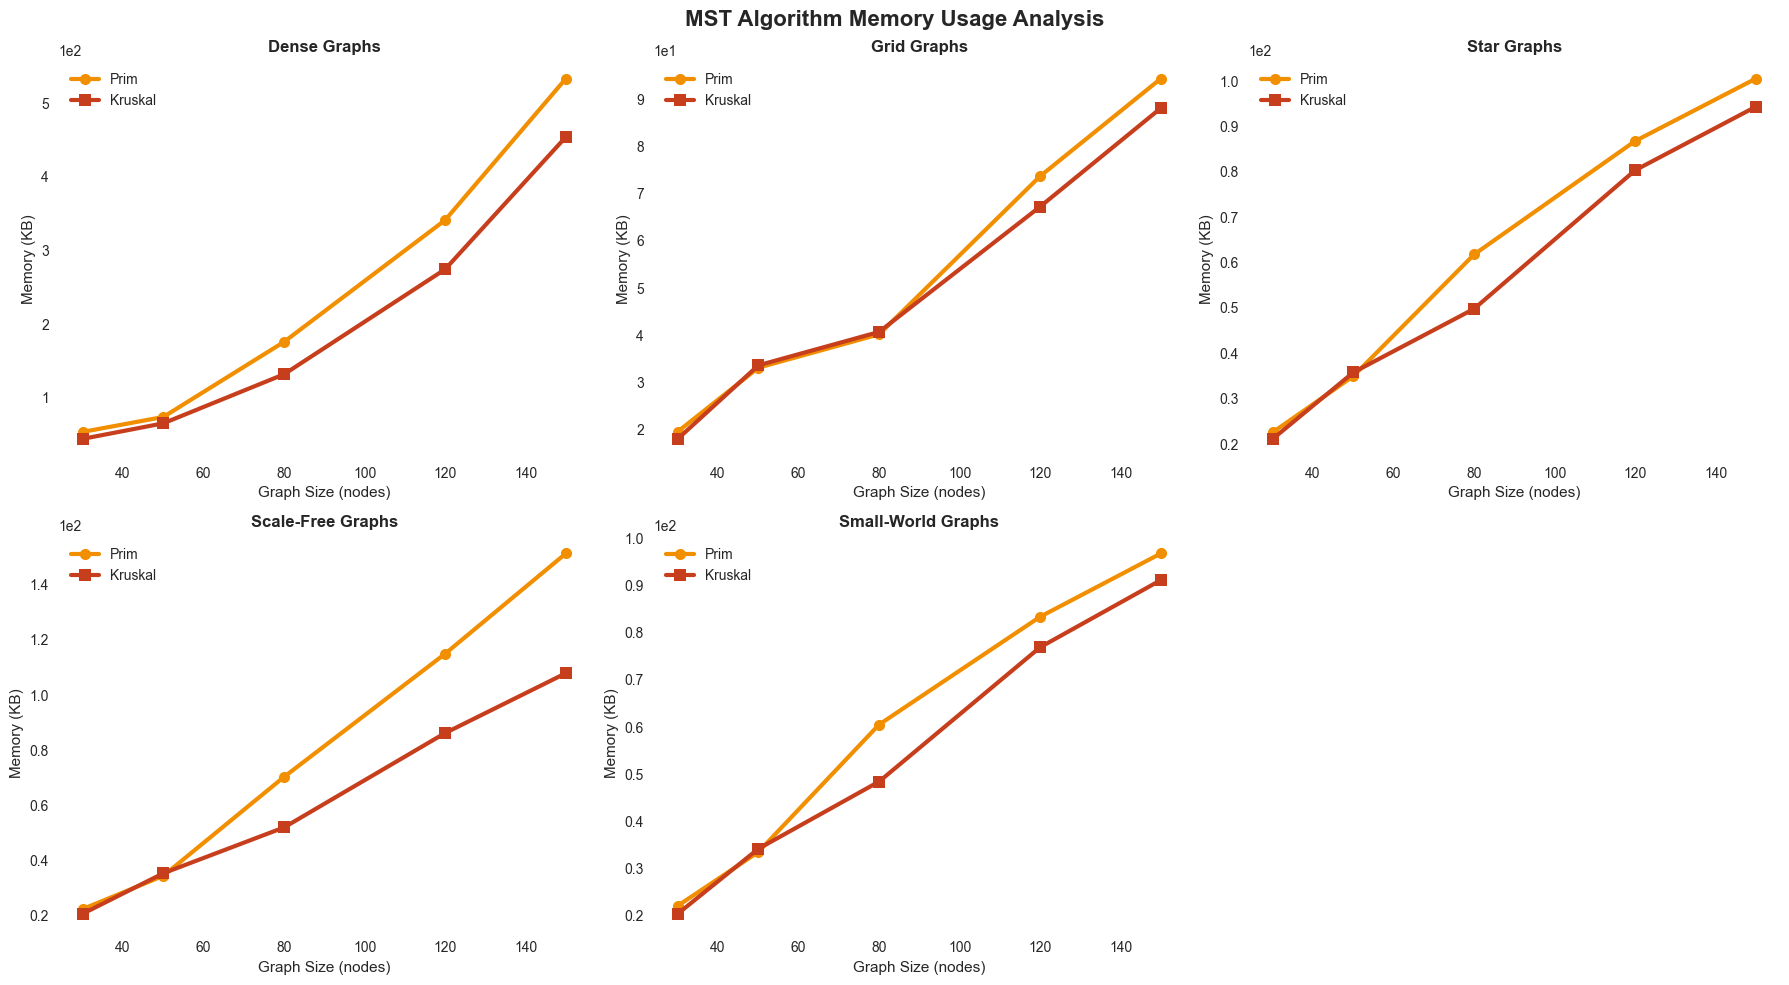

<Figure size 800x550 with 0 Axes>

✓ Memory comparison plots generated!

Step 5: Analyzing performance trends...

Performance Analysis Summary:

Dense Graphs:
  • Kruskal is faster than Prim for 4/5 test cases
  • Kruskal uses less memory than Prim for 5/5 test cases

Grid Graphs:
  • Prim is consistently faster than Kruskal
  • Kruskal uses less memory than Prim for 3/5 test cases

Star Graphs:
  • Prim is consistently faster than Kruskal
  • Kruskal uses less memory than Prim for 4/5 test cases

Scale-Free Graphs:
  • Prim is consistently faster than Kruskal
  • Kruskal uses less memory than Prim for 4/5 test cases

Small-World Graphs:
  • Prim is consistently faster than Kruskal
  • Kruskal uses less memory than Prim for 4/5 test cases

✓ Results saved to 'mst_performance_results.csv'

ANALYSIS COMPLETE


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import tracemalloc
import pandas as pd
from networkx.algorithms.tree import minimum_spanning_tree
import warnings
warnings.filterwarnings('ignore')

# Set up better color palette and style
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')

# Define colors manually
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8E44AD']
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

class GraphGenerator:
    """Class to generate different types of graphs for MST analysis"""
    
    @staticmethod
    def generate_dense_graph(n):
        """Generate a dense graph with many edges"""
        return nx.gnm_random_graph(n, n*(n-1)//4, seed=42)  # Reduced density for better visualization
    
    @staticmethod
    def generate_grid_graph(n):
        """Generate a 2D grid graph"""
        side = int(n**0.5)
        G = nx.grid_2d_graph(side, side)
        return nx.convert_node_labels_to_integers(G)
    
    @staticmethod
    def generate_star_graph(n):
        """Generate a star graph (one central node connected to all others)"""
        return nx.star_graph(n-1)
    
    @staticmethod
    def generate_barabasi_graph(n):
        """Generate a scale-free Barabasi-Albert graph"""
        return nx.barabasi_albert_graph(n, max(1, n//10))
    
    @staticmethod
    def generate_small_world_graph(n):
        """Generate a small-world Watts-Strogatz graph"""
        return nx.watts_strogatz_graph(n, k=4, p=0.3)

class MSTAnalyzer:
    """Class to analyze MST algorithm performance"""
    
    def __init__(self):
        self.graph_generators = {
            'Dense': GraphGenerator.generate_dense_graph,
            'Grid': GraphGenerator.generate_grid_graph,
            'Star': GraphGenerator.generate_star_graph,
            'Scale-Free': GraphGenerator.generate_barabasi_graph,
            'Small-World': GraphGenerator.generate_small_world_graph
        }
        self.results = []
    
    def assign_random_weights(self, G):
        """Assign random weights to graph edges"""
        for (u, v) in G.edges():
            G[u][v]['weight'] = random.randint(1, 10)
        return G
    
    def measure_performance(self, G, algorithm):
        """Measure execution time and memory usage of MST algorithm"""
        tracemalloc.start()
        start_time = time.perf_counter()
        
        if algorithm == 'prim':
            mst = minimum_spanning_tree(G, algorithm='prim')
        elif algorithm == 'kruskal':
            mst = minimum_spanning_tree(G, algorithm='kruskal')
        
        end_time = time.perf_counter()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        
        return (end_time - start_time), peak / 1024  # Convert to KB
    
    def run_analysis(self, sizes=[50, 100, 200, 300, 400]):
        """Run performance analysis on different graph types and sizes"""
        self.results = []
        
        print("Running MST Algorithm Performance Analysis...")
        print("=" * 50)
        
        for size in sizes:
            print(f"Testing graphs of size {size}...")
            for graph_name, graph_func in self.graph_generators.items():
                try:
                    G = graph_func(size)
                    G = self.assign_random_weights(G)
                    
                    # Measure Prim's algorithm
                    t_prim, m_prim = self.measure_performance(G, 'prim')
                    
                    # Measure Kruskal's algorithm
                    t_kruskal, m_kruskal = self.measure_performance(G, 'kruskal')
                    
                    self.results.append({
                        'Graph Type': graph_name,
                        'Size': size,
                        'Prim Time (s)': t_prim,
                        'Prim Memory (KB)': m_prim,
                        'Kruskal Time (s)': t_kruskal,
                        'Kruskal Memory (KB)': m_kruskal
                    })
                except Exception as e:
                    print(f"Error with {graph_name} graph of size {size}: {e}")
        
        return pd.DataFrame(self.results)
    
    def plot_performance_comparison(self, df):
        """Create performance comparison plots"""
        plt.figure(figsize=(20, 12))
        
        graph_types = df['Graph Type'].unique()
        n_types = len(graph_types)
        
        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('MST Algorithm Performance Analysis - Execution Time', fontsize=16, fontweight='bold')
        
        # Flatten axes for easier indexing
        axes_flat = axes.flatten()
        
        for idx, graph_type in enumerate(graph_types):
            if idx >= 6:  # Limit to 6 subplots
                break
                
            subdf = df[df['Graph Type'] == graph_type]
            ax = axes_flat[idx]
            
            # Plot with different markers and colors
            ax.plot(subdf['Size'], subdf['Prim Time (s)'], 
                   marker='o', linewidth=3, markersize=8, 
                   label='Prim', color=colors[0])
            ax.plot(subdf['Size'], subdf['Kruskal Time (s)'], 
                   marker='s', linewidth=3, markersize=8, 
                   label='Kruskal', color=colors[1])
            
            ax.set_title(f'{graph_type} Graphs', fontsize=12, fontweight='bold')
            ax.set_xlabel('Graph Size (nodes)')
            ax.set_ylabel('Time (seconds)')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            # Format axes
            ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
        
        # Remove empty subplots
        for idx in range(len(graph_types), 6):
            fig.delaxes(axes_flat[idx])
        
        plt.tight_layout()
        plt.show()
        
        # Force display
        plt.draw()
        plt.pause(0.001)
    
    def plot_memory_comparison(self, df):
        """Create memory usage comparison plots"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('MST Algorithm Memory Usage Analysis', fontsize=16, fontweight='bold')
        
        graph_types = df['Graph Type'].unique()
        axes_flat = axes.flatten()
        
        for idx, graph_type in enumerate(graph_types):
            if idx >= 6:
                break
                
            subdf = df[df['Graph Type'] == graph_type]
            ax = axes_flat[idx]
            
            ax.plot(subdf['Size'], subdf['Prim Memory (KB)'], 
                   marker='o', linewidth=3, markersize=8, 
                   label='Prim', color=colors[2])
            ax.plot(subdf['Size'], subdf['Kruskal Memory (KB)'], 
                   marker='s', linewidth=3, markersize=8, 
                   label='Kruskal', color=colors[3])
            
            ax.set_title(f'{graph_type} Graphs', fontsize=12, fontweight='bold')
            ax.set_xlabel('Graph Size (nodes)')
            ax.set_ylabel('Memory (KB)')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            # Format axes
            ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
        
        # Remove empty subplots
        for idx in range(len(graph_types), 6):
            fig.delaxes(axes_flat[idx])
        
        plt.tight_layout()
        plt.show()
        
        # Force display
        plt.draw()
        plt.pause(0.001)
    
    def analyze_performance_trends(self, df):
        """Analyze and print performance trends"""
        print("\nPerformance Analysis Summary:")
        print("=" * 50)
        
        for graph_type in df['Graph Type'].unique():
            subdf = df[df['Graph Type'] == graph_type]
            
            # Find where one algorithm consistently outperforms the other
            kruskal_faster = subdf[subdf['Kruskal Time (s)'] < subdf['Prim Time (s)']]
            kruskal_memory_efficient = subdf[subdf['Kruskal Memory (KB)'] < subdf['Prim Memory (KB)']]
            
            print(f"\n{graph_type} Graphs:")
            if not kruskal_faster.empty:
                print(f"  • Kruskal is faster than Prim for {len(kruskal_faster)}/{len(subdf)} test cases")
            else:
                print(f"  • Prim is consistently faster than Kruskal")
            
            if not kruskal_memory_efficient.empty:
                print(f"  • Kruskal uses less memory than Prim for {len(kruskal_memory_efficient)}/{len(subdf)} test cases")
            else:
                print(f"  • Prim uses less memory than Kruskal")
    
    def visualize_sample_graphs(self):
        """Visualize sample graphs of each type"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Sample Graph Types', fontsize=16, fontweight='bold')
        axes_flat = axes.flatten()
        
        sample_size = 12  # Smaller size for better visualization
        
        for idx, (graph_name, graph_func) in enumerate(self.graph_generators.items()):
            if idx >= 6:
                break
            
            try:
                G = graph_func(sample_size)
                G = self.assign_random_weights(G)
                
                ax = axes_flat[idx]
                
                # Create layout
                if graph_name == 'Grid':
                    # Special layout for grid graphs
                    side = int(sample_size**0.5)
                    pos = {}
                    for i, node in enumerate(G.nodes()):
                        pos[node] = (i % side, i // side)
                elif graph_name == 'Star':
                    # Special layout for star graphs
                    pos = nx.spring_layout(G, center=(0, 0), k=3, iterations=50)
                else:
                    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
                
                # Draw nodes
                nx.draw_networkx_nodes(G, pos, 
                                     node_color=colors[idx % len(colors)], 
                                     node_size=400, 
                                     alpha=0.8, 
                                     ax=ax)
                
                # Draw edges
                nx.draw_networkx_edges(G, pos, 
                                     edge_color='gray', 
                                     alpha=0.6, 
                                     width=2, 
                                     ax=ax)
                
                # Draw node labels
                nx.draw_networkx_labels(G, pos, 
                                      font_size=10, 
                                      font_weight='bold', 
                                      font_color='white',
                                      ax=ax)
                
                # Draw edge labels (weights) - only for smaller graphs
                if len(G.edges()) <= 20:
                    edge_labels = nx.get_edge_attributes(G, 'weight')
                    nx.draw_networkx_edge_labels(G, pos, edge_labels, 
                                               font_size=8, ax=ax)
                
                ax.set_title(f'{graph_name} Graph\n({len(G.nodes())} nodes, {len(G.edges())} edges)', 
                           fontsize=12, fontweight='bold')
                ax.axis('off')
                
            except Exception as e:
                ax.text(0.5, 0.5, f'Error generating\n{graph_name} graph', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{graph_name} Graph (Error)')
                ax.axis('off')
        
        # Remove empty subplot if needed
        if len(self.graph_generators) < 6:
            fig.delaxes(axes_flat[5])
        
        plt.tight_layout()
        plt.show()
        
        # Force display
        plt.draw()
        plt.pause(0.001)

def main():
    """Main function to run the MST analysis"""
    print("="*60)
    print("MST ALGORITHM PERFORMANCE ANALYZER")
    print("="*60)
    
    # Initialize analyzer
    analyzer = MSTAnalyzer()
    
    # Show sample graphs first
    print("Step 1: Generating sample graph visualizations...")
    try:
        analyzer.visualize_sample_graphs()
        print("✓ Sample graphs generated successfully!")
    except Exception as e:
        print(f"✗ Error generating sample graphs: {e}")
    
    # Run performance analysis
    print("\nStep 2: Running performance analysis...")
    sizes = [30, 50, 80, 120, 150]  # Smaller sizes for faster execution
    
    try:
        df = analyzer.run_analysis(sizes)
        print("✓ Performance analysis completed!")
        
        # Display results
        print("\nStep 3: Displaying detailed results...")
        print(df.round(6))
        
        # Create visualizations
        print("\nStep 4: Creating performance comparison plots...")
        analyzer.plot_performance_comparison(df)
        print("✓ Time comparison plots generated!")
        
        analyzer.plot_memory_comparison(df)
        print("✓ Memory comparison plots generated!")
        
        # Analyze trends
        print("\nStep 5: Analyzing performance trends...")
        analyzer.analyze_performance_trends(df)
        
        # Save results to CSV
        try:
            df.to_csv('mst_performance_results.csv', index=False)
            print(f"\n✓ Results saved to 'mst_performance_results.csv'")
        except:
            print(f"\n✗ Could not save results to CSV")
            
    except Exception as e:
        print(f"✗ Error during analysis: {e}")
        import traceback
        print(traceback.format_exc())
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)

# Alternative simple test function
def test_visualization():
    """Simple test function to check if matplotlib is working"""
    print("Testing basic matplotlib functionality...")
    
    try:
        # Test 1: Simple plot
        plt.figure(figsize=(8, 6))
        x = [1, 2, 3, 4, 5]
        y = [2, 4, 6, 8, 10]
        plt.plot(x, y, marker='o', color='blue', linewidth=2)
        plt.title('Simple Test Plot')
        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.grid(True)
        plt.show()
        print("✓ Basic plotting works!")
        
        # Test 2: Simple graph
        G = nx.complete_graph(5)
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=500, font_size=16, font_weight='bold')
        plt.title('Simple NetworkX Graph')
        plt.show()
        print("✓ NetworkX visualization works!")
        
        return True
        
    except Exception as e:
        print(f"✗ Visualization test failed: {e}")
        return False

if __name__ == "__main__":
    main()